In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Patch

# Data frames

In [69]:
url_base = 'https://raw.githubusercontent.com/Seikened/semestre_IV/refs/heads/main/graphic_visualization/proyecto_final/data/'
ds_alohondiga =url_base + 'alhondiga_930.csv'
ds_basilica =url_base + 'basilica_colegiata_560.csv'
ds_callejon =url_base + 'callejon_del_beso_1360.csv'
ds_casadiego =url_base + 'casa_de_diego_rivera_698.csv'
ds_jardin =url_base + 'jardin_de_la_union_1134.csv'
ds_mercado =url_base + 'mercado_hidalgo_600.csv'
ds_monumento =url_base + 'monumento_pipila_1620.csv'
ds_museo =url_base + 'museo_de_las_momias_1650.csv'
ds_teatro =url_base + 'teatro_juarez_1010.csv'
ds_universidad =url_base + 'universidad_de_guanajuato_900.csv'



# Dataframe de cada lugar
df_alhondiga = pd.read_csv(ds_alohondiga)
df_basilica = pd.read_csv(ds_basilica)
df_callejon = pd.read_csv(ds_callejon)
df_casadiego = pd.read_csv(ds_casadiego)
df_jardin = pd.read_csv(ds_jardin)
df_mercado = pd.read_csv(ds_mercado)
df_monumento = pd.read_csv(ds_monumento)
df_museo = pd.read_csv(ds_museo)
df_teatro = pd.read_csv(ds_teatro)
df_universidad = pd.read_csv(ds_universidad)

In [70]:
lista_lugares = (
    'Alhóndiga',
    'Basílica\n Colegiata',
    'Callejón\n del Beso',
    'Casa de\n Diego Rivera',
    'Jardín de\n la Unión',
    'Mercado\n Hidalgo',
    'Monumento\n Pípila',
    'Museo de \n las Momias',
    'Teatro \n Juárez',
    'Universidad de\n Guanajuato'
)

lugares_data = {
    'Alhóndiga': df_alhondiga,
    'Basílica \nColegiata': df_basilica,
    'Callejón del\nBeso': df_callejon,
    'Casa de\nDiego Rivera': df_casadiego,
    'Jardín de\nla Unión': df_jardin,
    'Mercado\nHidalgo': df_mercado,
    'Monumento\nPípila': df_monumento,
    'Museo de\nlas Momias': df_museo,
    'Teatro\nJuárez': df_teatro,
    'Universidad de\nGuanajuato': df_universidad
}

In [71]:
for site_name, df in lugares_data.items():
    df['sitio'] = site_name

all_sites = pd.concat(lugares_data.values(), ignore_index=True)
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10462 entries, 0 to 10461
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Género                    10462 non-null  object 
 1   Edad                      9747 non-null   float64
 2   Nacional ó Internacional  10462 non-null  object 
 3   Calificación              10462 non-null  object 
 4   Escala                    10462 non-null  int64  
 5   Número de aportaciones    10461 non-null  float64
 6   Título de la opinión      10462 non-null  object 
 7   Opinión                   10462 non-null  object 
 8   País                      10462 non-null  object 
 9   Idioma                    10462 non-null  object 
 10  Dispositivo               10462 non-null  object 
 11  Fecha                     10462 non-null  object 
 12  sitio                     10462 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.0+ MB


In [72]:
df_alhondiga['Edad'].mean()

np.float64(40.706593406593406)

In [73]:
lista_edades = []
for lugar in lugares_data:
    promedio_edad = lugares_data[lugar]['Edad'].mean()
    lista_edades.append(round(promedio_edad))
print(lista_edades)

[41, 42, 39, 44, 41, 41, 38, 39, 42, 39]


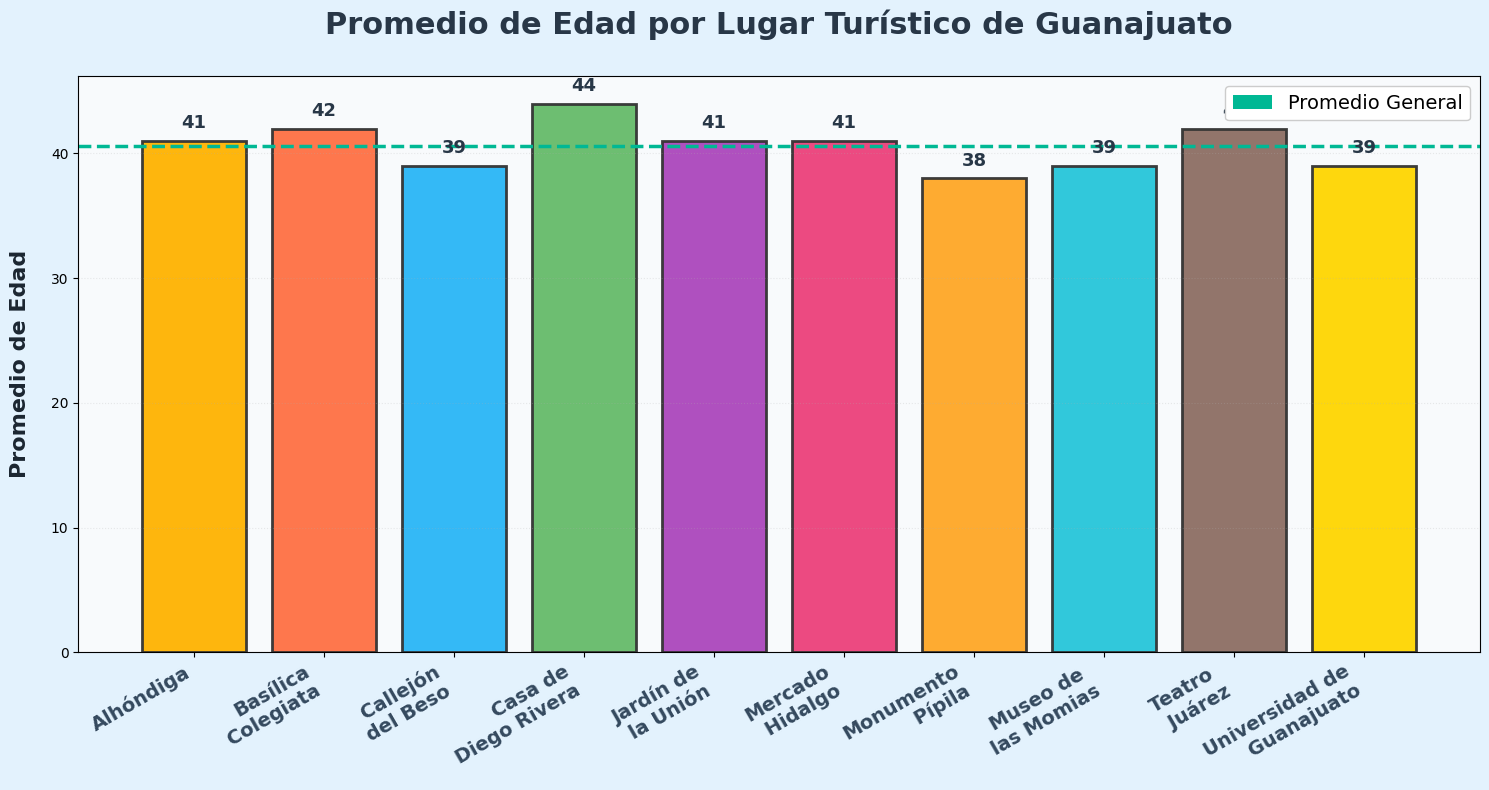

In [74]:
plt.figure(figsize=(15, 8))

# Paleta de colores vibrantes inspirada en turismo
turismo_colors = [
    "#FFB300", # Amarillo sol
    "#FF7043", # Naranja cálido
    "#29B6F6", # Azul cielo
    "#66BB6A", # Verde naturaleza
    "#AB47BC", # Morado fiesta
    "#EC407A", # Rosa mexicano
    "#FFA726", # Naranja atardecer
    "#26C6DA", # Turquesa
    "#8D6E63", # Café tierra
    "#FFD600"  # Amarillo brillante
]

barras = plt.bar(lista_lugares, lista_edades, 
                 color=turismo_colors, 
                 edgecolor='#333', linewidth=2, alpha=0.95)

plt.title('Promedio de Edad por Lugar Turístico de Guanajuato', fontsize=22, fontweight='bold', pad=30, color='#283747')
plt.ylabel('Promedio de Edad', fontsize=16, fontweight='bold', labelpad=15, color='#1b2631')
plt.grid(axis='y', linestyle=':', alpha=0.25)

plt.gca().set_facecolor('#f8fafc')
plt.gcf().patch.set_facecolor('#e3f2fd')

plt.xticks(rotation=30, ha='right', fontsize=14, fontweight='bold', color='#34495e')

for barra, edad in zip(barras, lista_edades):
    plt.text(barra.get_x() + barra.get_width() / 2, 
             barra.get_height() + 0.7,  
             f'{int(edad)}',  
             ha='center', va='bottom', 
             fontsize=13, fontweight='bold', 
             color='#283747')

promedio = np.mean(lista_edades)
plt.axhline(y=promedio, color='#00b894', linestyle='--', linewidth=2.5, 
            label=f'Promedio General: {promedio:.0f} años')

legend_elements = [
    Patch(facecolor='#00b894', edgecolor='none', label='Promedio General')
]
plt.legend(handles=legend_elements, loc='upper right', framealpha=1, fontsize=14)

plt.tight_layout()
plt.show()

In [75]:
df_alhondiga.Calificación.unique()

array(['Excelente', 'Muy bueno', 'Pésimo', 'Regular', 'Malo'],
      dtype=object)

In [76]:
promedioYDesviacion = all_sites.groupby('sitio').agg(
    promedioCalificacion=('Escala', 'mean'),
    desviacionCalificacion=('Escala', 'std')
).reset_index()
promedioYDesviacion = promedioYDesviacion.sort_values(by='promedioCalificacion', ascending=False)
top_10 = promedioYDesviacion.head(10)
print(top_10)

                        sitio  promedioCalificacion  desviacionCalificacion
8              Teatro\nJuárez              4.702970                0.518146
9  Universidad de\nGuanajuato              4.603333                0.612613
4         Jardín de\nla Unión              4.591711                0.607370
1        Basílica \nColegiata              4.500000                0.668750
0                   Alhóndiga              4.454839                0.745711
6           Monumento\nPípila              4.377778                0.767950
3       Casa de\nDiego Rivera              4.243553                0.804039
2          Callejón del\nBeso              3.995588                0.971247
5            Mercado\nHidalgo              3.948333                0.950703
7        Museo de\nlas Momias              3.675152                1.136495


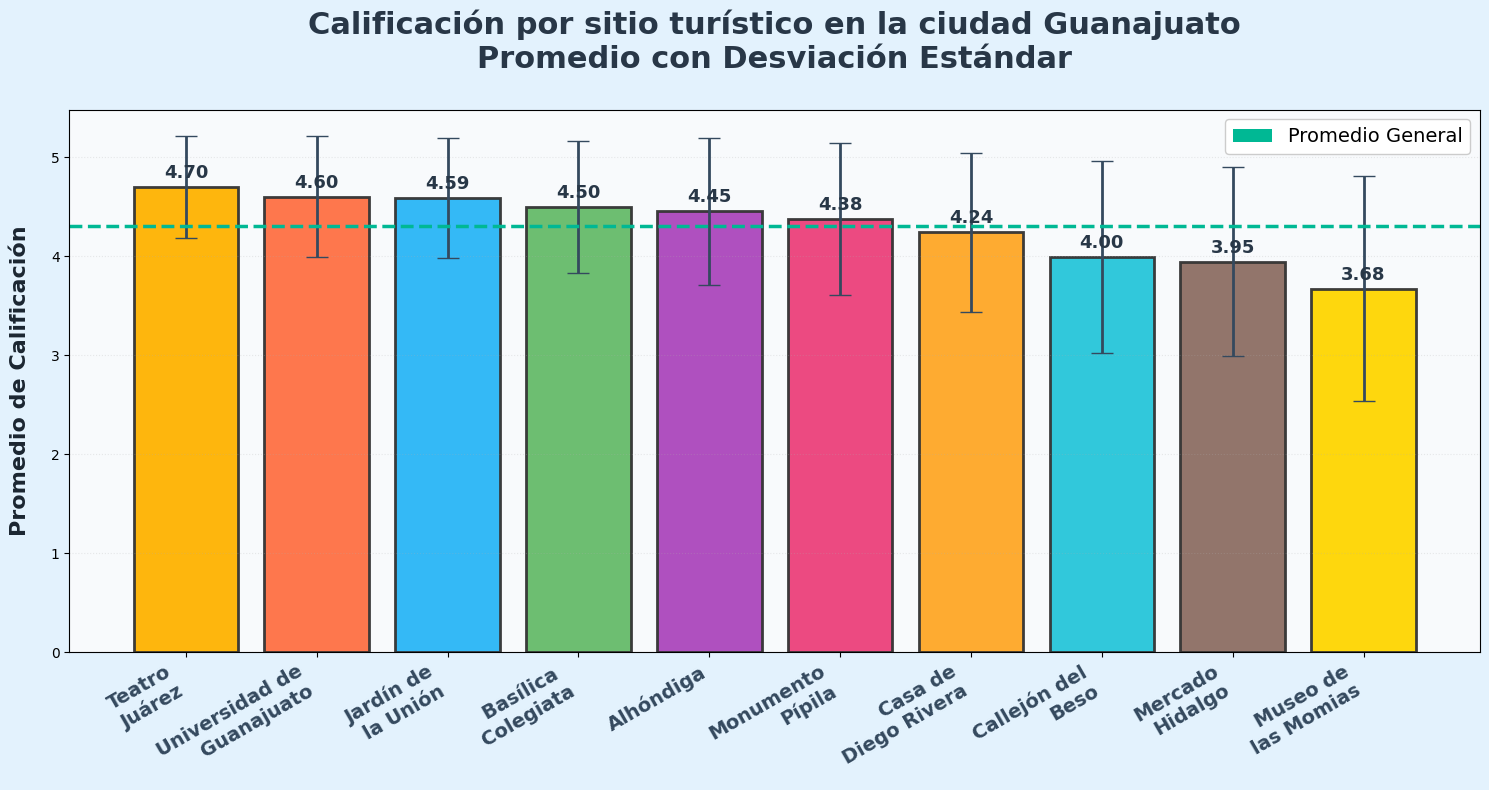

In [77]:
sitios = promedioYDesviacion['sitio']
promedios = promedioYDesviacion['promedioCalificacion']
desviaciones = promedioYDesviacion['desviacionCalificacion']

plt.figure(figsize=(15, 8))

turismo_colors = ['#FFB300', '#FF7043', '#29B6F6', '#66BB6A', '#AB47BC', '#EC407A', '#FFA726', '#26C6DA', '#8D6E63', '#FFD600']

barras = plt.bar(sitios, promedios, 
                 yerr=desviaciones, capsize=8,
                 color=turismo_colors, 
                 edgecolor='#333', linewidth=2, alpha=0.95,
                 error_kw={'elinewidth': 2, 'ecolor': '#34495e'})

plt.title('Calificación por sitio turístico en la ciudad Guanajuato\nPromedio con Desviación Estándar',
          fontsize=22, fontweight='bold', pad=30, color='#283747')
plt.ylabel('Promedio de Calificación', fontsize=16, fontweight='bold', labelpad=15, color='#1b2631')
plt.grid(axis='y', linestyle=':', alpha=0.25)

plt.gca().set_facecolor('#f8fafc')
plt.gcf().patch.set_facecolor('#e3f2fd')

plt.xticks(rotation=30, ha='right', fontsize=14, fontweight='bold', color='#34495e')

for barra, promedio in zip(barras, promedios):
    plt.text(barra.get_x() + barra.get_width() / 2, 
             barra.get_height() + 0.05,  
             f'{promedio:.2f}',  
             ha='center', va='bottom', 
             fontsize=13, fontweight='bold', 
             color='#283747')

promedio_global = np.mean(promedios)
plt.axhline(y=promedio_global, color='#00b894', linestyle='--', linewidth=2.5, 
            label=f'Promedio General: {promedio_global:.2f}')

legend_elements = [
    Patch(facecolor='#00b894', edgecolor='none', label='Promedio General')
]
plt.legend(handles=legend_elements, loc='upper right', framealpha=1, fontsize=14)

plt.tight_layout()
plt.show()

In [78]:
conteo = all_sites['Nacional ó Internacional'].value_counts()
print(conteo)

total_personas = (5639 + 4823) 
nacional = (5639 / total_personas) * 100
internacional = ( 4823 / total_personas) * 100
print(f'Nacional {nacional}, Internacional {internacional}')


Nacional ó Internacional
Nacional         5639
Internacional    4823
Name: count, dtype: int64
Nacional 53.89982794876696, Internacional 46.10017205123304


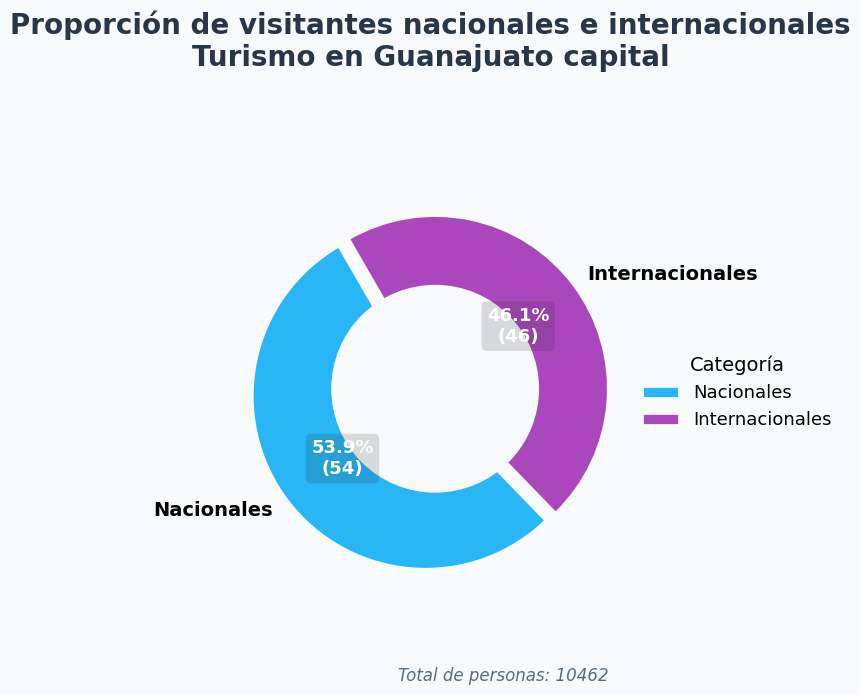

In [79]:
plt.style.use('seaborn-v0_8-pastel')
plt.rcParams['font.family'] = 'DejaVu Sans'

conteo = pd.Series([nacional, internacional], index=['Nacionales', 'Internacionales'])

fig, ax = plt.subplots(figsize=(7, 7), facecolor='#f8fafc')
colors = ['#29B6F6', '#AB47BC']
explode = (0.07, 0)

wedges, texts, autotexts = ax.pie(
    conteo,
    labels=conteo.index,
    colors=colors,
    autopct=lambda p: f'{p:.1f}%\n({int(round(p*sum(conteo)/100))})',
    startangle=120,
    explode=explode,
    shadow=False,
    wedgeprops={'linewidth': 2, 'edgecolor': '#f8fafc'},
    textprops={'fontsize': 14, 'fontweight': 'bold'}
)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(13)
    autotext.set_fontweight('bold')
    autotext.set_bbox(dict(facecolor='#222', alpha=0.15, edgecolor='none', boxstyle='round,pad=0.3'))

ax.set_title(
    'Proporción de visitantes nacionales e internacionales\nTurismo en Guanajuato capital',
    fontsize=20, fontweight='bold', pad=28, color='#283747'
)

ax.legend(
    wedges, conteo.index,
    title="Categoría",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    frameon=False,
    fontsize=13,
    title_fontsize=14
)

plt.figtext(
    0.5, 0.02,
    f'Total de personas: {total_personas}',
    ha='center', fontsize=12, style='italic', color='#34495e', alpha=0.8
)

centre_circle = plt.Circle((0, 0), 0.60, fc='#f8fafc')
fig.gca().add_artist(centre_circle)

ax.axis('equal')
plt.tight_layout()
plt.show()